In [1]:
import pandas as pd

In [2]:
%run Burlington_Data_2021.ipynb

In [3]:
%run Oshawa.ipynb

175383 and 159458
    1070 and     1015
  1400 and   1300
   42875 and    19720
 42750 and  23880
 Median sale price in 2016 : $420,000 & median sale price in 2021 : $765,000
the latitude is: 43.8975558 and the longitude is: -78.8635324


In [4]:
%run Housing.ipynb

193832, 213759
66270, 73560
113666, 128000
6.9, 11.7
0.83%, 0.72%
1,791 1,824
2,437 3,193
54130, 57025
12135, 16530
{'features': [{'bbox': [-79.8109532, 43.3648541, -79.6198948, 43.5284371],
               'geometry': {'coordinates': [-79.666672, 43.447436],
                            'type': 'Point'},
               'properties': {'address_line1': 'Oakville, ON',
                              'address_line2': 'Canada',
                              'category': 'administrative',
                              'city': 'Oakville',
                              'country': 'Canada',
                              'country_code': 'ca',
                              'county': 'Halton Region',
                              'datasource': {'attribution': '© OpenStreetMap '
                                                            'contributors',
                                             'license': 'Open Database License',
                                             'sourcename': 'openstree

In [5]:
%run Vaughan.ipynb

Population 2016: 306233
Population 2021: 323103
Income 2016:    90615
Income 2021: 124000
Unemployment Rate 2016:   5.8
Unemployment Rate 2021:    12.5
Tax Rate 2016: 0.815855
Tax Rate 2021: 0.669976
Estimated Price 2016:   893065
Estimated Price 2021: 1282000
Average Rental 2016: 2492
Average Rental 2021: 2841
Median Rental 2016: 2300
Median Rental 2021: 2550
Average Sale Price 2016: 656698
Average Sale Price 2021: 1299913
Median Sale Price 2016: 600000
Median Sale Price 2021: 1200000
Number Owned 2016:    84490
Number Owned 2021:  89290
Number Rented 2016:     9765
Number Rented 2021:  14620
Number of Newly Built 2016: 2,270
Number of Newly Built 2021: 5,564
Latitude: 43.7963436
Longitude: -79.60313070528753
251


In [6]:
%run "Milton Analysis Project 1 Bootcamp.ipynb"

In [7]:
all_cities_df = pd.concat([burlington_final_df, Oakville_df, vaughan_df, cleaned_milton_df, Oshawa_df])
all_cities_df = all_cities_df.iloc[:, :-1]
all_cities_df = all_cities_df.replace({'\$': '', ',': '', '%': ''}, regex=True)
all_cities_df = all_cities_df.astype(float)
all_cities_df

Population  Household Income ($)  Average Rent ($)  \
City       Year                                                        
Burlington 2016     183314.0              123402.0            2710.0   
           2021     186948.0              140200.0            2862.0   
Oakville   2016     193832.0              113666.0            3154.0   
            2021    213759.0              128000.0            3363.0   
Vaughan    2016     306233.0               90615.0            2492.0   
            2021    323103.0              124000.0            2841.0   
Milton     2016     110128.0              120157.0            2821.0   
           2021     132979.0              142600.0            2785.0   
Oshawa     2016     159458.0               70211.0            1070.0   
            2021    175383.0               86000.0            1400.0   

                  Median Rent ($)  Estimated House Value ($)  \
City       Year                                                
Burlington 2016            2400.0                   632556.0   
           2021            2800.0                  1024000.0   
Oakville   2016            2588.0                   883853.0   
            2021           3000.0                  1388000.0   
Vaughan    2016            2300.0                   893065.0   
            2021           2550.0                  1282000.0   
Milton     2016            2150.0                   622911.0   
           2021            2650.0                  1022000.0   
Oshawa     2016            1015.0                   397934.0   
            2021           1300.0                   705000.0   

                  Unemployment Rate (%)  Property Tax Rate (%)  Rented Houses  \
City       Year                                                                 
Burlington 2016                     5.6               0.871013        16835.0   
           2021                    10.7               0.779583        18220.0   
Oakville   2016                     6.9               0.830000        12135.0   
            2021                   11.7               0.720000        16530.0   
Vaughan    2016                     5.8               0.815855         9765.0   
            2021                   12.5               0.669976        14620.0   
Milton     2016                     5.6               0.006820         4840.0   
           2021                    11.4               0.007449         6950.0   
Oshawa     2016                     9.8               1.561085        19720.0   
            2021                   15.2               1.304741        23880.0   

                  Owned Houses  New Built  Average Sale Price ($)  \
City       Year                                                     
Burlington 2016        54540.0      542.0                663675.0   
           2021        54955.0     1494.0               1081961.0   
Oakville   2016        54130.0     1791.0               1063117.0   
            2021       57025.0     1824.0               1579928.0   
Vaughan    2016        84490.0     2270.0                656698.0   
            2021       89290.0     5564.0               1299913.0   
Milton     2016        29415.0      891.0                657525.0   
           2021        33085.0     1073.0               1104704.0   
Oshawa     2016        42875.0      834.0                443635.0   
            2021       42750.0     1416.0                798221.0   

                  Median Sale Price ($)  
City       Year                          
Burlington 2016                609000.0  
           2021                975500.0  
Oakville   2016                920000.0  
            2021              1387500.0  
Vaughan    2016                600000.0  
            2021              1200000.0  
Milton     2016                621000.0  
           2021                990000.0  
Oshawa     2016                420000.0  
            2021               765000.0

In [8]:
all_amenities_df = pd.concat([burlington_amenities_df, Oakville_amenities_df, vaughan_amenities_df, milton_leisure_df, Oshawa_amenities_df])
all_amenities_df = all_amenities_df.astype(int)
all_amenities_df

,# of Public Schools,# of Catholic Schools,# of Private Schools,# of Leisure Spaces
City,,,,
Burlington,38,17,2,282
Oakville,39,28,32,428
Vaughan,3,3,8,251
Milton,21,14,4,234
Oshawa,32,15,8,356


# Analysis

# Unemployment Rate

Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Duis dictum arcu mi. Curabitur fermentum arcu justo, ac ultricies tellus aliquam suscipit. Praesent malesuada libero augue, sit amet aliquam ex sagittis quis. Ut at nunc arcu. Proin ut vulputate arcu. Donec eu neque in justo elementum porta. Morbi at commodo magna.

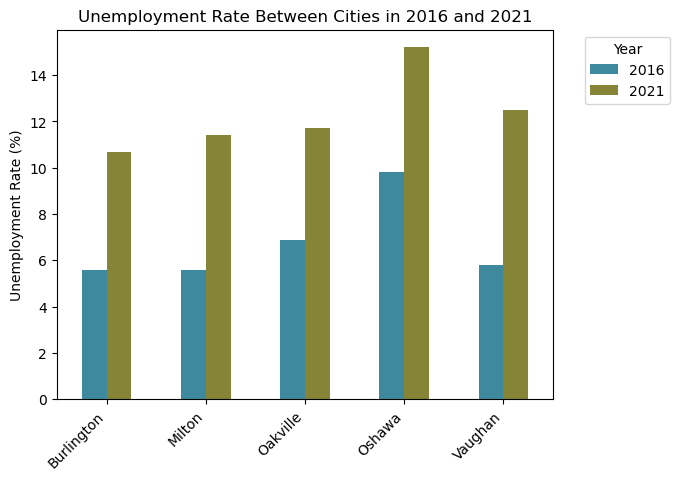

In [16]:
import matplotlib.pyplot as plt

# Reset index to get Year into its own column and change type to integer
all_cities_reset_df = all_cities_df.reset_index(level='Year')
all_cities_reset_df['Year'] = all_cities_reset_df['Year'].astype(int)

# Filter the DataFrame to include only the relevant columns
unemployment_df = all_cities_reset_df[['Year', 'Unemployment Rate (%)']]

# Pivot the DataFrame to have 'Year' as the columns
unemployment_pivot = unemployment_df.pivot(columns='Year', values='Unemployment Rate (%)')

# Plot the bar graph
unemployment_pivot.plot(kind='bar', stacked=False,color=['#3f899e', '#858437'])
plt.title('Unemployment Rate Between Cities in 2016 and 2021')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.legend(title='Year', bbox_to_anchor=(1.25, 1))
plt.show()

# Total number of leisure places per city
Vestibulum nec enim scelerisque, consequat purus at, lacinia diam. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Phasellus suscipit velit ut sem feugiat rhoncus in nec justo. Praesent eu pellentesque est. Interdum et malesuada fames ac ante ipsum primis in faucibus. Morbi pharetra ornare enim, sit amet posuere enim fringilla id. Aliquam mattis dignissim augue ac finibus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Curabitur vestibulum velit vitae magna aliquet, nec condimentum arcu mollis.

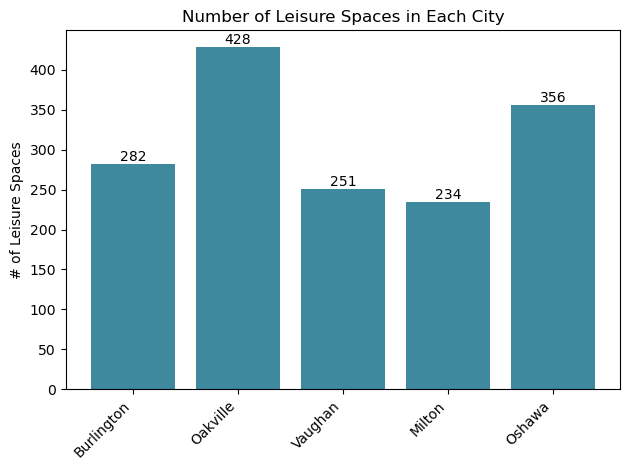

In [13]:
import matplotlib.pyplot as plt

# Reset index to get Year into its own column and change type to integer
all_amenities_reset_df = all_amenities_df.reset_index(level='City')
all_amenities_reset_df['City'] = all_amenities_reset_df['City']

# Filter the DataFrame to include only the relevant columns
leisure_df = all_amenities_reset_df[['City', '# of Leisure Spaces']]

# Extracting data for the bar graph
cities = leisure_df['City']
leisure_spaces = leisure_df['# of Leisure Spaces']

# Create Graph
bars = plt.bar(cities, leisure_spaces, color='#3f899e')
plt.ylabel('# of Leisure Spaces')
plt.title('Number of Leisure Spaces in Each City')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability

# Adding count numbers to the top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()

#plt.tight_layout()
plt.show()